In [1]:
import scipy.io
import networkx as nx
import numpy as np
import h5py

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the MATLAB file
dat = scipy.io.loadmat('/home/mw894/diss/gnm/test-weights/demo_data.mat')

D = dat["demo_data"]["D"][0][0]
A_init = dat["demo_data"]["seed"][0][0]
W_Y = dat["demo_data"]["Wtgt"][0][0]
coord = dat["demo_data"]["coordinates"][0][0]
A_Y =  (W_Y > 0).astype(np.float64)

pos = {i: coord[i,:]  for i in range(0, A_Y.shape[0])}

# The graph to visualize
G1 = nx.Graph(A_Y)

#norm
W_Y = W_Y / np.max(W_Y)

for i, j in G1.edges():
    weight = W_Y[i, j]
    G1[i][j]['weight'] = weight

In [6]:
f = h5py.File("/store/DAMTPEGLEN/mw894/data/weighted/sample_00805.res", 'r')

# Get the dataset
A_Y_head = np.array(f['A_final_pcomb'])
W_Y_head = np.array(f['W_final_pcomb'])

# The graph to visualize
G2 = nx.Graph(A_Y_head)

#norm
W_Y_head = W_Y_head / np.max(W_Y_head)

for i, j in G2.edges():
    weight = W_Y_head[i, j]
    G2[i][j]['weight'] = weight

/tmp/ipykernel_978947/3492885058.py:13: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_978947/3492885058.py:14: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_978947/3492885058.py:15: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/tmp/ipykernel_978947/3492885058.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_978947/3492885058.py:62: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_978947/3492885058.py:63: UserWar

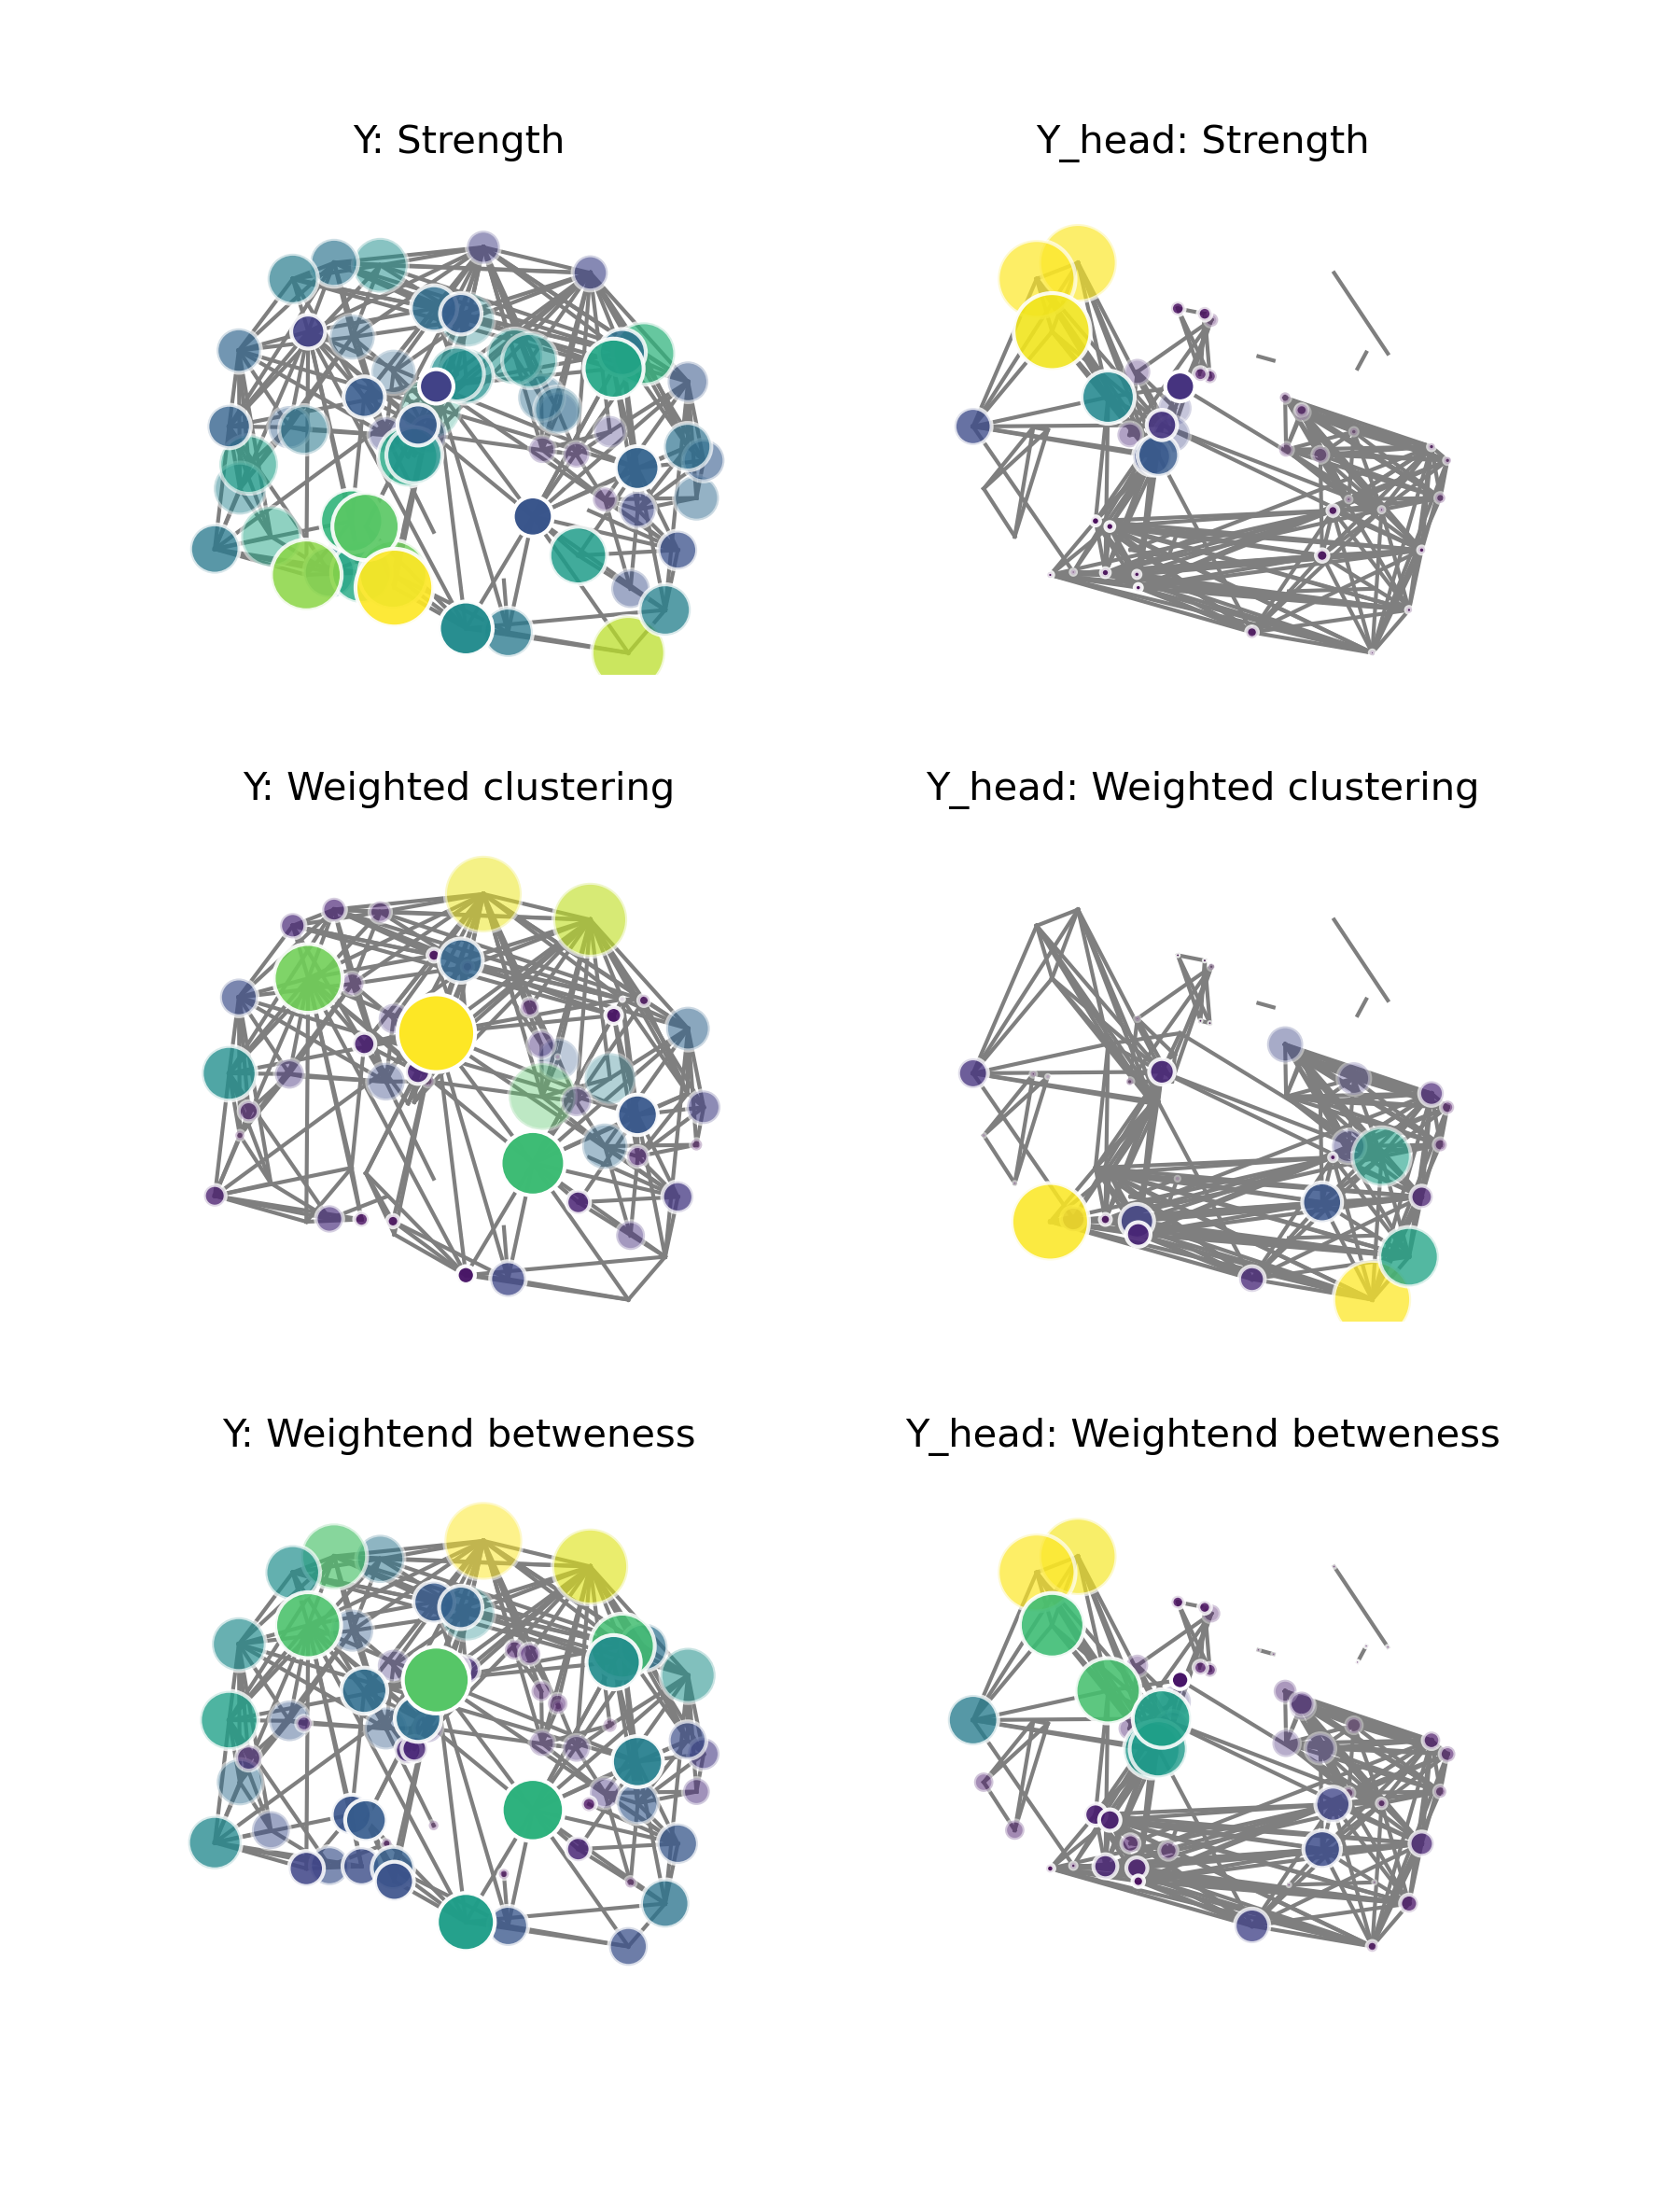

In [7]:
def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    #ax.set_xlabel("x")
    #ax.set_ylabel("y")
    #ax.set_zlabel("z")

    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.axis('off')


fig, axs = plt.subplots(3, 2, figsize=(8, 10), dpi = 300,subplot_kw={'projection': '3d'},
                          constrained_layout=True, gridspec_kw={'hspace': -0.25, 'wspace': -0.25,
                          'width_ratios': [2, 2], 'height_ratios': [2,2, 2]})

gs =[G1,G2]
gs_names = ["Y", "Y_head"]

for j in range(0,2):
    G = gs[j]
    measures = [
        nx.clustering(G, weight='weight'),
        nx.betweenness_centrality(G, weight='weight'),
        dict(nx.degree(G, weight='weight'))]
    
    m_name =  ["Strength", "Weighted clustering", "Weightend betweness"]

    for i in range(0,3):
        # 3d spring layout
        # Extract node and edge positions from the layout
        node_xyz = np.array([pos[v] for v in sorted(G)])
        edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

        # Calculate the degree of each node

        max_degree = max(measures[i].values())
        node_sizes = [400 * measures[i][node] / max_degree for node in G.nodes()]

        # Create the 3D figure
        #fig = plt.figure()
        #ax = fig.add_subplot(111, projection="3d")
        ax = axs[i][j]

        # Plot the nodes - alpha is scaled by "depth" automatically
        ax.scatter(*node_xyz.T, s=node_sizes, ec="w", c=node_sizes, cmap='viridis')

        # Plot the edges
        for vizedge in edge_xyz:
            ax.plot(*vizedge.T, color="tab:gray", linewidth=1.0)

        title = ax.set_title(gs_names[j] +": "+ m_name[i], y = 0.9, fontsize=10)

        _format_axes(ax)

fig.tight_layout()
plt.tight_layout()
plt.savefig("graphs.pdf", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()